### 학과: IT미디어공학과
### 학번: 20191035
### 이름 : 장혜림

## Chap 3. 프로야구 선수의 다음 해 연봉 예측

### 코랩에서 matplotlib 그래프의 한글 폰트 지정 방법
* 1. 나눔 폰트 다운로드
* 2. 런타임 메뉴에서 런타임 다시 시작
* 3. matplotlib의 폰트를 Nanum 폰트로 지정

In [ ]:
# 1. 나눔 폰트 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,791 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
# 2. [런타임] 메뉴에서 [런타임 다시 시작]을 선택한다.
# 3. matplotlib의 폰트를 Nanum 폰트로 지정한다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') 

### <Step1. 탐색> 프로야구 연봉 데이터 살펴보기

[1.1] 프로야구 연봉 데이터셋의 기본 정보

In [ ]:
# 로컬 디스크 데이터를 가져오기 위해 google.colab에서 files라는 package를 import한다.
from google.colab import files
import io
import pandas as pd
import numpy as np

# 경고 메세지 숨기기
import warnings
warnings.filterwarnings("ignore")

# files.upload()에 의해 [파일 선택] 버튼이 생성된다.
picher_file_path = files.upload()

Saving picher_stats_2017.csv to picher_stats_2017.csv


In [ ]:
# read_csv()으로 업로드된 파일을 Byte단위로 읽어서 데이터프레임을 생성한다.
picher = pd.read_csv(io.BytesIO(picher_file_path['picher_stats_2017.csv']))
 
# info()로 데이터의 기초 정보 출력하기
print(picher.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [ ]:
# picher 데이터프레임의 컬럼명만 확인한다.
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [ ]:
# picher 데이터프레임의 상위 5개의 데이터를 보여준다
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [ ]:
# picher 데이터프레임의 크기를 확인한다.
picher.shape

(152, 22)

In [ ]:
# files.upload()에 의해 [파일 선택] 버튼이 생성된다.
batter_file_path = files.upload()

Saving batter_stats_2017.csv to batter_stats_2017.csv


In [ ]:
# read_csv()으로 업로드된 파일을 Byte단위로 읽어서 데이터프레임을 생성한다.
batter = pd.read_csv(io.BytesIO(batter_file_path['batter_stats_2017.csv'])) 

# info()로 데이터의 기초 정보 출력하기
print(batter.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       191 non-null    object 
 1   팀명        191 non-null    object 
 2   경기        191 non-null    int64  
 3   타석        191 non-null    int64  
 4   타수        191 non-null    int64  
 5   안타        191 non-null    int64  
 6   홈런        191 non-null    int64  
 7   득점        191 non-null    int64  
 8   타점        191 non-null    int64  
 9   볼넷        191 non-null    int64  
 10  삼진        191 non-null    int64  
 11  도루        191 non-null    int64  
 12  BABIP     191 non-null    object 
 13  타율        191 non-null    float64
 14  출루율       191 non-null    float64
 15  장타율       191 non-null    float64
 16  OPS       191 non-null    float64
 17  wOBA      191 non-null    float64
 18  WAR       191 non-null    float64
 19  연봉(2018)  191 non-null    int64  
 20  연봉(2017)  191 non-null    int64 

In [ ]:
# batter 데이터프레임의 컬럼명만 확인한다.
batter.columns

Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')

In [ ]:
# batter 데이터프레임의 상위 5개의 데이터를 보여준다
batter.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,130,527,430,136,46,89,113,70,107,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,514,176,26,98,120,96,82,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,483,177,20,91,78,41,64,20,0.39,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500
3,나성범,NC,125,561,498,173,24,103,99,48,116,17,0.413,0.347,0.415,0.584,0.999,0.416,5.64,43000,35000
4,손아섭,롯데,144,667,576,193,20,113,80,83,96,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000


In [ ]:
# batter 데이터프레임의 크기를 확인한다.
print(batter.shape)

(191, 21)


-----

[1.2] 예측할 대상인 '연봉'에 대한 정보
* 예측할 회귀 분석의 목표(Y값)는 데이터의 '연봉(2018)' 피처이다.
* 히스토그램으로 연봉 분포를 파악한다.
* 상자 그래프로 연봉의 일반적인 범주를 파악한다.

In [ ]:
# 연봉(2018) 피처의 기초 통계정보를 확인한다.
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

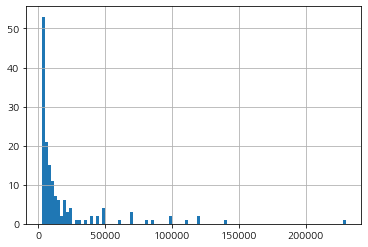

In [ ]:
## picher 데이터프레임의 연봉(2018) 피처에 대한 히스토그램을 그리시오
## 구간은 100으로 지정하시오
picher['연봉(2018)'].hist(bins=100)

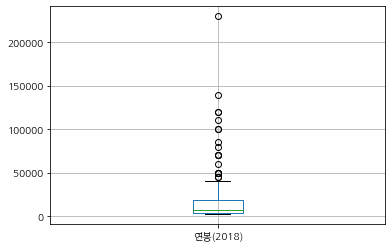

In [ ]:
## picher 데이터프레임의 연봉(2018) 컬럼의  상자 그래프을 그리시오.

picher.boxplot(column=['연봉(2018)'])

-----

### [1.3] 회귀 분석에 사용할 피처 살펴보기

In [ ]:
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]

In [ ]:
## 피처 각각에 대한 histogram을 출력하는 함수를 정의하시오.

def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16] 
    fig = plt.figure(1) 
    
    ## df의 column 갯수 만큼의 subplot을 그리시오
    for i in range(len(df.columns)):  ## 컬럼의 수만큼 인덱스 리스트를 생성하시오
        ax = fig.add_subplot(5, 5, i+1) ## 5행 5열에서 i+1번째 서브그래프를 추가하시오
        plt.hist(df[df.columns[i]], bins=50) ## i번째 컬럼으로 히스토그램 생성하시오.
        ax.set_title(df.columns[i]) ## 서브그래프의 타이틀 지정하시오.
    plt.show()

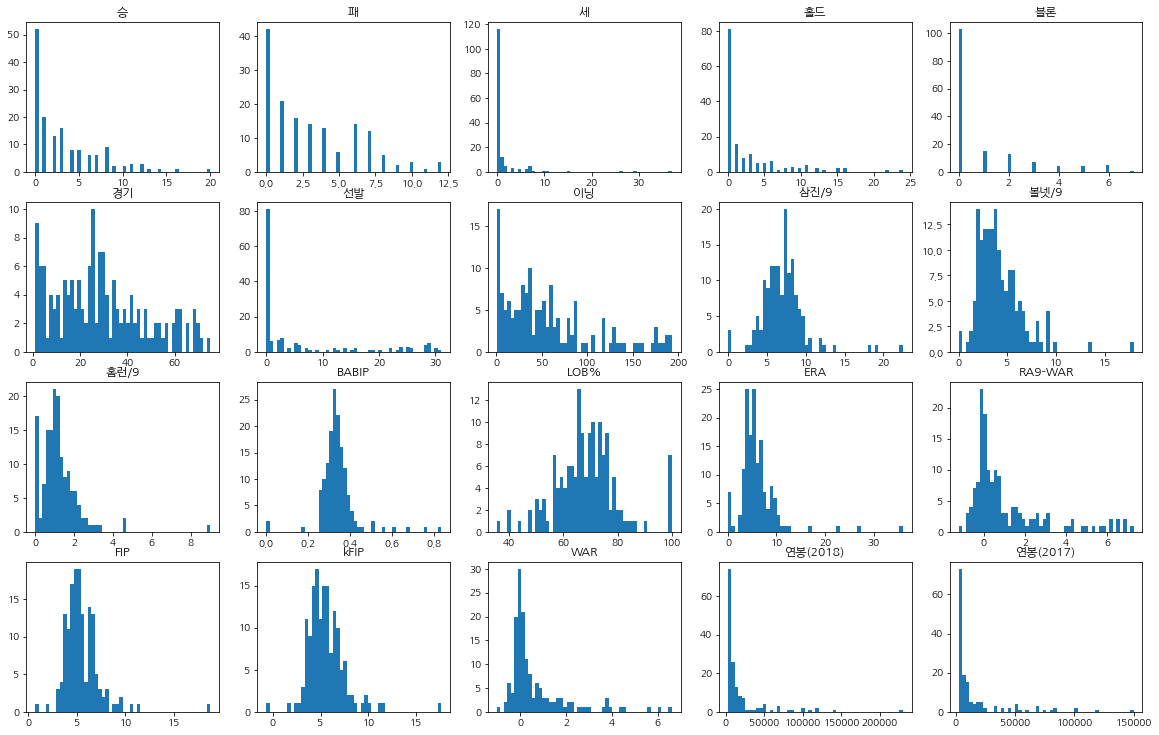

In [ ]:
# 피처 각각에 대한 histogram을 출력하는 함수를 호출한다.
# plot_hist_each_column()는 picher_features_df 데이터프레임을 매개변수로 받는다.
plot_hist_each_column(picher_features_df)

-----

### <Step2. 예측> : 투수의 연봉 예측하기

[2.1] 연속형 피처들의 단위 맞춰주기 : 피처 스케일링

In [ ]:
# pandas 형태로 정의된 데이터를 출력할 때, 
# scientific-notation(과학표기법:지수표현)이 아닌 float 모양으로 출력되게 해준다.
pd.options.mode.chained_assignment = None

In [ ]:
## 피처 각각에 대한 scaling를 수행하는 함수를 정의하시오

def standard_scaling(df, scale_columns): 
    for col in scale_columns:
        series_mean = df[col].mean() ## 각 컬럼의 평균을 구하시오
        series_std = df[col].std()   ## 각 컬럼의 표준편차를 구하시오

        ## 각 컬럼의 원소마다 표준화를 수행하는 람다함수를 적용하는 코드를 완성하시오.
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [ ]:
# 함수 매개변수로 사용할 피처 리스트를 만든다.
# [1.3]에서 picher_features_df 를 복사해서 '연봉(2018)' 컬럼을 삭제하여 사용한다.
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']

# scaling을 수행하는 함수를 호출한다. 매개변수는 picher데이터프레임과 피처리스트이다.
picher_df = standard_scaling(picher, scale_columns)

In [ ]:
## picher_df 데이터프레임의 연봉(2018) 컬럼명을 y로 바꾸시오
picher_df = picher_df.rename(columns={'연봉(2018)' : 'y'})

picher_df.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,-0.869000,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,-0.987502,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,-0.885929,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,-0.945180,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,-0.877464,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


-----

[2.2] 범주형 피처들의 단위 맞춰주기 : 원-핫 인코딩(one-hot-encoding)

In [ ]:
## picher_df 데이터프레임의 '팀명' 피처를 one-hot encoding으로 변환하시오
team_encoding = pd.get_dummies(picher_df['팀명'])

team_encoding.head(5)

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [ ]:
## picher_df 데이터프레임에서 '팀명' 피처를 삭제하시오.
## 열방향으로 동작하도록 axis 매개변수를 지정하시오
picher_df = picher_df.drop('팀명', axis=1)

## picher_df 데이터프레임에 정규화된 team_encoding을 병합하시오
picher_df = picher_df.join(team_encoding)
picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,-0.869000,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,-0.987502,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,-0.885929,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,-0.945180,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,-0.877464,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705,0,0,0,0,0,0,1,0,0


-----

### [2.3] 선형 회귀 분석 적용하기

* 입력데이터와 타깃(정답)데이터 준비하기

In [ ]:
# 파이썬 머신러닝 라이브러리인 사이킷런(sklearn)을 임포트한다.
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 입력데이터와 타깃데이터로 사용할 picher_df 데이터프레임의 컬럼들을 확인한다.
picher_df.columns

Index(['선수명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', 'y',
       '연봉(2017)', 'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성', '한화'],
      dtype='object')

In [ ]:
## picher_df 데이터프레임의 '선수명'과 'y' 피처들을 제외한 나머지 피처들을 선택하시오
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]

## picher_df 데이터프레임의 'y' 피처을 선택하시오
y = picher_df['y']

* 훈련세트와 테스트세트로 분리하기

In [ ]:
## 입력데이터(X), 타깃데이터(y)를 훈련세트와 테스트세트로 분할하시오.
## 테스트세트크기를 0.2로 지정하시오.
## 랜덤시드를 19로 지정하시오.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

* 선형회귀 모델을 훈련시키고 학습된 계수 출력하기




In [ ]:
# LinearRegression클래스의 선형회귀모델 lr를 생성한다.
lr = linear_model.LinearRegression()

## 선형회귀모델 lr를 훈련세트로 훈련시키시오
model = lr.fit(X_train, y_train)

In [ ]:
## 선형회귀모델 lr의 학습된 계수를 출력하시오.
print(lr.coef_)

[ -1481.01733901   -416.68736601 -94136.23649209  -1560.86205158
   1572.00472193   -747.04952389  -1375.53830289   -523.54687556
   3959.10653661    898.37638984  10272.48746451  77672.53804469
  -2434.38947427   -892.11801281    449.91117164   7612.15661812
   1271.04500059  -2810.5564514    5396.97279896  -4797.30275904
   -250.69773139    236.02530053  19130.59021357    854.02604585
   1301.61974637   3613.84063182   -935.07281796  18144.60099745]


## <Step3. 평가> : 예측 모델 평가하기

### [3.1] 어떤 피처가 가장 영향력이 강한 피처일까?

* statsmodel 라이브러리 OLS(Ordinary Least Squares)클래스로 회귀분석을 실행한다.

In [ ]:
# statsmodel 라이브러리를 설치한다.
!pip install statsmodels

In [ ]:
# statsmodels.api 라이브러리를 임포트한다.
import statsmodels.api as sm

# 훈련세트에 상수(constant)를 추가한다.
X_train = sm.add_constant(X_train)

## OLS 회귀모델을 훈련세트로 훈련시키시오.
model = sm.OLS(y_train, X_train).fit()

# summary()으로 분석에 대한 요약을 한눈에 볼 수 있다
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           7.70e-42
Time:                        01:07:34   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.678e+04    697.967     24.036      0.000    1.54e+04    1.82e+04
BABIP      -1481.0173   1293.397     -1.145      0.255   -4049.448    1087.414
ERA         -416.6874   2322.402     -0.179      0.858   -5028.517    4195.143
FIP        -9.414e+04   9.43e+04     -0.998      0.321   -2.81e+05    9.31e+04
KIA          303.1852   2222.099      0.136      0.892   -4109.462    4715.833
KT          3436.0520   2133.084      1.611      0.111    -799.831    7671.935
LG          1116.9978   2403.317      0.465      0.643   -3655.513    5889.509
LOB%       -1375.5383   1564.806     -0.879      0.382   -4482.933    1731.857
NC          1340.5004   2660.966      0.504      0.616   -3943.651    6624.652
RA9-WAR     3959.1065   2931.488      1.351      0.180   -1862.247    9780.460
SK          2762.4237   2243.540      1.231      0.221   -1692.803    7217.650
WAR         1.027e+04   2532.309      4.057      0.000    5243.823    1.53e+04
kFIP        7.767e+04   7.95e+04      0.977      0.331   -8.03e+04    2.36e+05
경기         -2434.3895   2953.530     -0.824      0.412   -8299.515    3430.736
두산           971.9293   2589.849      0.375      0.708   -4170.998    6114.857
롯데          2313.9585   2566.009      0.902      0.370   -2781.627    7409.544
볼넷/9        7612.1566   6275.338      1.213      0.228   -4849.421    2.01e+04
블론          1271.0450   1242.128      1.023      0.309   -1195.576    3737.666
삼성          -946.5092   2482.257     -0.381      0.704   -5875.780    3982.762
삼진/9        5396.9728   7286.221      0.741      0.461   -9072.019    1.99e+04
선발         -4797.3028   5489.352     -0.874      0.384   -1.57e+04    6103.463
세           -250.6977   1295.377     -0.194      0.847   -2823.059    2321.663
승            236.0253   2215.264      0.107      0.915   -4163.049    4635.100
연봉(2017)    1.913e+04   1270.754     15.055      0.000    1.66e+04    2.17e+04
이닝           854.0260   6623.940      0.129      0.898   -1.23e+04     1.4e+04
패           1301.6197   1935.935      0.672      0.503   -2542.763    5146.003
한화          5477.8879   2184.273      2.508      0.014    1140.355    9815.421
홀드          -935.0728   1637.923     -0.571      0.569   -4187.663    2317.518
홈런/9        1.814e+04   1.68e+04      1.082      0.282   -1.52e+04    5.14e+04
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     3.49e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

* OLS 모델이 학습한 회귀 계수들을 시각화한다.

In [ ]:
## OLS 회귀모델(model)이 학습한 회귀계수들(params)을 리스트로 변환하시오.
coefs = model.params.tolist()

## coefs 리스트를 판다스의 시리즈로 변환하시오.
coefs_series =  pd.Series(coefs)

# model.params을 확인해본다.
print(model.params)

const       16776.425668
BABIP       -1481.017339
ERA          -416.687366
FIP        -94136.236492
KIA           303.185245
KT           3436.052018
LG           1116.997773
LOB%        -1375.538303
NC           1340.500421
RA9-WAR      3959.106537
SK           2762.423686
WAR         10272.487465
kFIP        77672.538045
경기          -2434.389474
두산            971.929284
롯데           2313.958468
볼넷/9         7612.156618
블론           1271.045001
삼성           -946.509155
삼진/9         5396.972799
선발          -4797.302759
세            -250.697731
승             236.025301
연봉(2017)    19130.590214
이닝            854.026046
패            1301.619746
한화           5477.887928
홀드           -935.072818
홈런/9        18144.600997
dtype: float64


[Text(0, 0, 'const'),
 Text(0, 0, 'BABIP'),
 Text(0, 0, 'ERA'),
 Text(0, 0, 'FIP'),
 Text(0, 0, 'KIA'),
 Text(0, 0, 'KT'),
 Text(0, 0, 'LG'),
 Text(0, 0, 'LOB%'),
 Text(0, 0, 'NC'),
 Text(0, 0, 'RA9-WAR'),
 Text(0, 0, 'SK'),
 Text(0, 0, 'WAR'),
 Text(0, 0, 'kFIP'),
 Text(0, 0, '경기'),
 Text(0, 0, '두산'),
 Text(0, 0, '롯데'),
 Text(0, 0, '볼넷/9'),
 Text(0, 0, '블론'),
 Text(0, 0, '삼성'),
 Text(0, 0, '삼진/9'),
 Text(0, 0, '선발'),
 Text(0, 0, '세'),
 Text(0, 0, '승'),
 Text(0, 0, '연봉(2017)'),
 Text(0, 0, '이닝'),
 Text(0, 0, '패'),
 Text(0, 0, '한화'),
 Text(0, 0, '홀드'),
 Text(0, 0, '홈런/9')]

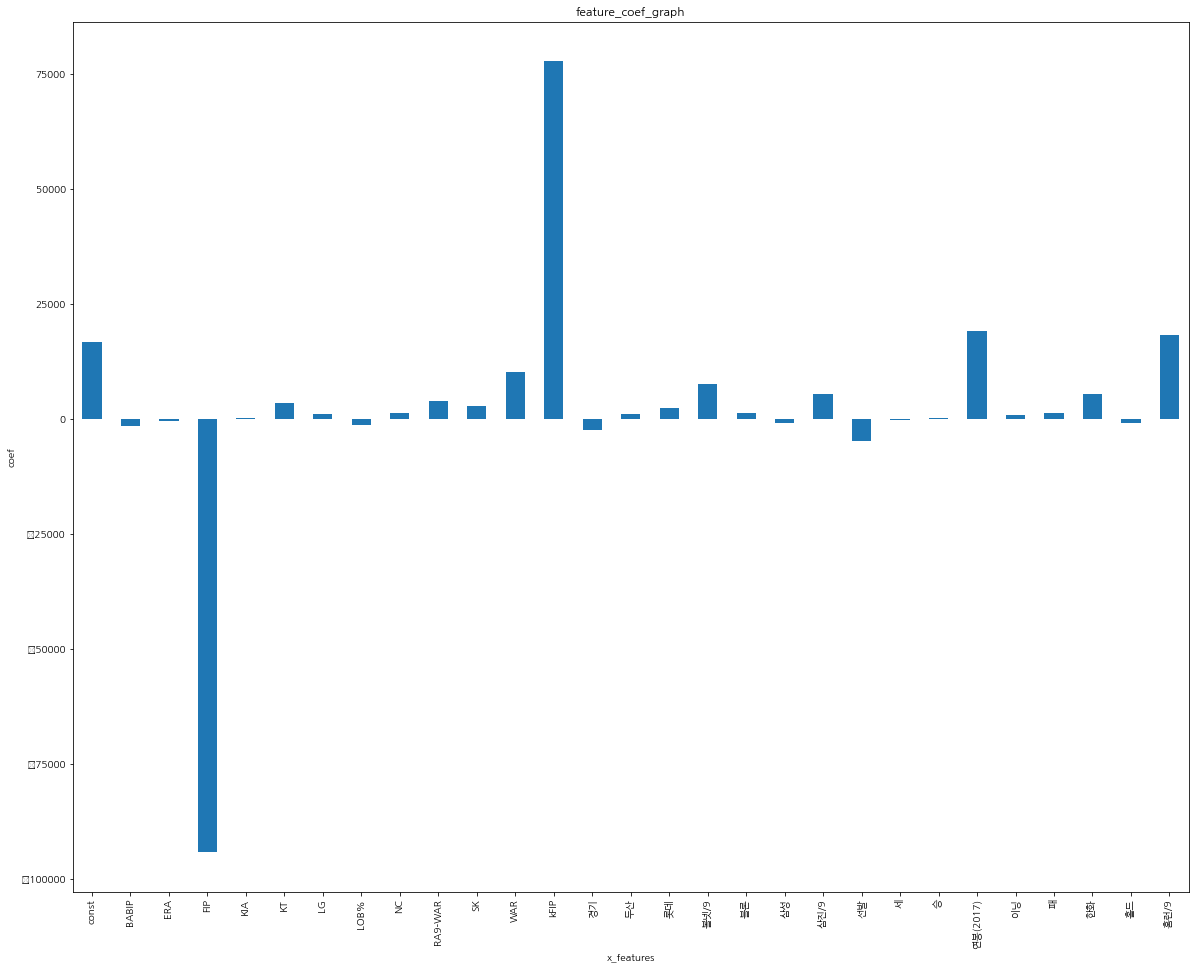

In [ ]:
## OLS 회귀모델(model)이 학습한 회귀계수들(params)의 인덱스를 리스트로 변환하시오.
x_labels = model.params.index.tolist()

## 회귀계수 시리즈(coefs_series)를 막대그래프로 그리시오.
ax = coefs_series.plot(kind='bar')

ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')

## x축 눈금레이블을 x_labels 로 지정하시오.
ax.set_xticklabels(x_labels)

-----

### [3.2] 회귀 예측 모델의 평가

* 데이터 준비하기 

In [ ]:
## picher_df 데이터프레임의 컬럼들중에 '선수명'과 'y' 즉 연봉(2018)을 제외한 나머지 
## 컬럼들을 선택하시오.
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]

## picher_df 데이터프레임에서 'y' 컬럼을 선택하시오
y = picher_df['y']

## 입력데이터(X), 타깃데이터(y)를 훈련세트와 테스트세트로 분리한다.
## 테스트세트 사이즈를 0.2로 지정한다
## 랜덤시드를 19로 지정한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

* 회귀 모델 객체를 만들고 훈련시키기

In [ ]:
# 선형회귀모델 lr를 생성한다.
lr = linear_model.LinearRegression()

## 선형회귀모델 lr를 훈련세트로 훈련시키시오.
model = lr.fit(X_train, y_train)

* R2 score로 평가하기 

In [ ]:
## 훈련된 모델(model)를 훈련세트로 평가하여 결정계수 R2를 출력하시오.
print(model.score(X_train, y_train))

## 훈련된 모델(model)를 테스트세트로 평가하여 결정계수 R2를 출력하시오.
print(model.score(X_test, y_test))

0.9276949405576705
0.8860171644977813


* RMSE score로 평가하기

In [ ]:
## 선형회귀모델 lr를 이용하여 훈련-입력데이터(X_train)의 예측값들을 구하시오.
y_predictions = lr.predict(X_train)

## 훈련-정답데이터와 예측값들의 RMSE 점수를 출력하시오
print(sqrt(mean_squared_error(y_train, y_predictions)))

## 선형회귀모델 lr를 이용하여 테스트-입력데이터(X_test)의 예측값들을 구하시오.
y_predictions = lr.predict(X_test)

## 테스트-정답데이터와 예측값들의 RMSE 점수를 출력하시오
print(sqrt(mean_squared_error(y_test, y_predictions)))

7282.718684746372
14310.696436889159


-----

### [3.3] 피처들의 상관관계 분석
* 히트맵(heatmap) 방식의 시각화를 사용

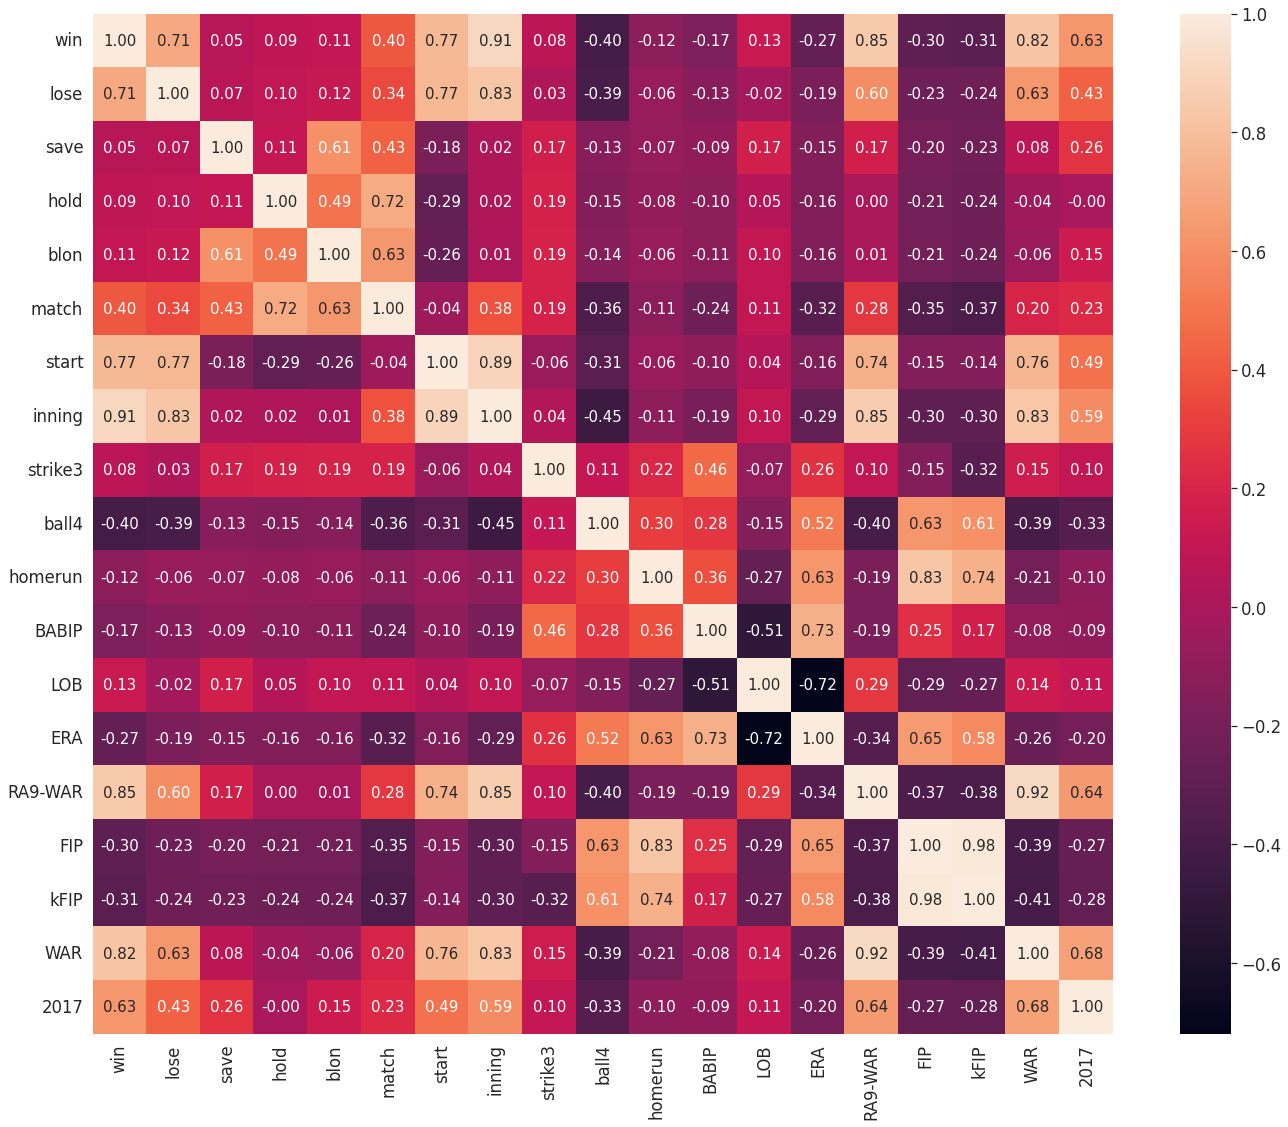

In [ ]:
# 히트맵를 그리기위해 seaborn 라이브러리를 임포트한다.
import seaborn as sns

# 함수 매개변수로 사용할 피처 리스트를 만든다.
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']

## picher_df 데이터프레임의 scale_columns 리스트의 피처간 상관계수를 계산하여 행렬로 반환하시오.
## 상관계수를 구하는 계산 방법은 pearson 방식을 사용한다.
corr = picher_df[scale_columns].corr(method='pearson')

# x축, y축 레이블로 사용할 리스트이다.
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 
             'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB', 
             'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']


sns.set(font_scale=1.5)  # 레이블 폰트 사이즈 조정

## corr 행렬을 히트맵으로 시각화하시오
hm = sns.heatmap(corr.values,   # 상관계수 행렬값
            cbar=True,    # colorbar의 유무
            annot=True,   # 각 cell의 값 표기 유무
            square=True,  # 정사각형 표시 유무
            fmt='.2f',     # 표시할 값의 format으로 소수점이하 2자리 float형
            annot_kws={'size': 15}, # 표시할 값의 keywords 폰트 사이즈는 15
            yticklabels=show_cols, # y축 레이블을 축약한 컬럼이름 사용
            xticklabels=show_cols) # x축 레이블을 축약한 컬럼이름 사용

plt.tight_layout() # 창 크기에 맞게 조정
plt.show()

-----

### [3.4] 회귀분석 예측 성능을 높이기 위한 방법 : 다중공선성 확인

In [ ]:
# 분산팽창요인(variance_inflation_factor: VIF) 클래스를 임포트한다.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# 피처마다의 VIF 계수를 출력한다.

## 빈 데이터프레임을 생성하시오
vif = pd.DataFrame()

## picher_df 데이터프레임에서 '선수명'과 'y' 을 제외하고 나머지 피처들을 선택하시오
X =  picher_df[picher_df.columns.difference(['선수명', 'y'])]
print(X.shape, X.shape[1])

## 컬럼수 만큼 반복하면서 각 컬럼의 값(X.values)에 대한 VIF 계수를 구하시오.
vif["VIF Factor"] = [variance_inflation_factor(X.values, i ) for i in range(X.shape[1])]
print(X.values)

## X 데이터프레임의 모든 컬럼명들을 "features" 피처에 저장하시오
vif["features"] = X.columns

## vif 데이터프레임의 값들을 반올림해서 소수점 한자리까지 출력하시오
vif.round(1)

(152, 28) 28
[[ 0.01678276 -0.58705567 -0.9710297  ...  0.         -0.58570521
  -0.44238194]
 [-0.24168646 -0.51985532 -1.06188793 ...  0.         -0.58570521
  -0.66852133]
 [-0.09559517 -0.62545587 -0.83741467 ...  0.         -0.58570521
  -0.4128855 ]
 ...
 [ 0.46629444  1.34735434  1.34852735 ...  0.         -0.58570521
   1.21925095]
 [ 0.00554496 -0.06625297  0.72855357 ...  0.         -0.36424453
   0.22620407]
 [-0.32035101  0.38974939  1.11870948 ...  0.         -0.58570521
   0.77680432]]


,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,1.1,KIA
4,1.1,KT
5,1.1,LG
6,4.3,LOB%
7,1.1,NC
8,13.6,RA9-WAR
9,1.1,SK


-----

### [3.5] 적절한 피처로 다시 분석하기

In [ ]:
# 재선정된 피처로 입력데이터를 만든다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]

## picher_df 데이터프레임에서 'y' 컬럼을 선택해서 타깃데이터를 만드시오
y = picher_df['y']

## 입력데이터(X), 타깃데이터(y)를 훈련세트와 테스트세트로 분리한다.
## 테스트세트 사이즈를 0.2로 지정한다
## 랜덤시드를 19로 지정한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [ ]:
# 선형회귀모델 lr를 생성한다. 
lr = linear_model.LinearRegression()

## 선형회귀모델 lr를 훈련세트로 훈련시키시오
model = lr.fit(X_train, y_train)

In [ ]:
## 훈련된 모델(model)를 훈련세트로 평가하여 결정계수 R2를 출력하시오.
print(model.score(X_train, y_train))

## 훈련된 모델(model)를 테스트세트로 평가하여 결정계수 R2를 출력하시오.
print(model.score(X_test, y_test))

0.9150591192570362
0.9038759653889862


In [ ]:
## 선형회귀모델 lr를 이용하여 훈련-입력데이터(X_train)의 예측값들을 구하시오.
y_predictions = lr.predict(X_train)

## 훈련-정답데이터와 예측값들의 RMSE 점수를 출력하시오
print(sqrt(mean_squared_error(y_train, y_predictions)))

## 선형회귀모델 lr를 이용하여 테스트-입력데이터(X_test)의 예측값들을 구하시오.
y_predictions = lr.predict(X_test)

## 테스트-정답데이터와 예측값들의 RMSE 점수를 출력하시오
print(sqrt(mean_squared_error(y_test, y_predictions)))

7893.462873347693
13141.866063591096


In [ ]:
# 피처마다의 VIF 계수를 출력한다.

# 재선정된 피처들로 입력데이터를 생성한다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
print(X.shape, X.shape[1])

## 빈 데이터프레임을 생성하시오
vif = pd.DataFrame()

## 컬럼수 만큼 반복하면서 각 컬럼의 값(X.values)에 대한 VIF 계수를 구하시오.
vif["VIF Factor"] = [variance_inflation_factor(X.values, i ) for i in range(X.shape[1])]


## X 데이터프레임의 모든 컬럼명들을 "features" 피처에 저장하시오
vif["features"] = X.columns

## vif 데이터프레임의 값들을 반올림해서 소수점 한자리까지 출력하시오
vif.round(1)

(152, 5) 5


,VIF Factor,features
0,1.9,FIP
1,2.1,WAR
2,1.9,볼넷/9
3,1.1,삼진/9
4,1.9,연봉(2017)


# <Step4. 시각화> : 분석 결과의 시각화

### [4.1] 예상 연봉과 실제 연봉 비교

In [ ]:
# 선정된 적절한 피처들만을 가지고  2018년 연봉을 예측한다.

# 선정된 적절한 피처들로 입력데이터를 생성한다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]

## 선형회귀모델 lr을 이용하여 선정된 피처들(X)을 가지고 2018년 연봉을 예측하시오.
predict_2018_salary = lr.predict(X)

## 예측된 2018년 연봉(predict_2018_salary)을 시리즈로 변환하시오.
picher_df['예측연봉(2018)'] =pd.Series(predict_2018_salary)

In [ ]:
# 원래의 picher 데이터프레임을 다시 만든다.
picher = pd.read_csv(io.BytesIO(picher_file_path['picher_stats_2017.csv']))

## '선수명'과 '연봉(2017)' 컬럼만으로 picher 데이터프레임을 만드시오.
picher = picher[['선수명', '연봉(2017)']]

## 표준화된 picher_df 데이터프레임을 'y' 즉 연봉(2018) 기준으로 내림차순 정렬하시오
result_df = picher_df.sort_values(by=['y'], ascending=False)

## 표준화된 result_df 데이터프레임에서 '연봉(2017)' 컬럼을 삭제하시오
## 열방향으로 동작하도록 매개변수를 지정하시오
## 내부 데이터가 실제로 삭제되도록 매개변수를 지정하시오.
## error를 무시하도록 매개변수를 지정하시오.
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')

## 표준화된 result_df 데이터프레임에 picher 데이터프레임을 병합하시오
## '선수명' 피처는 맨왼쪽에 위치시키시오
result_df = result_df.merge(picher, on=['선수명'], how='left')

# 표준화된 result_df 데이터프레임에서 4개의 컬럼만 선택한다.
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]

# 컬럼명을 재지정한다.
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

## 표준화된 result_df 데이터프레임에서 재계약하여 '작년연봉(2017)'과 '실제연봉(2018)'이 다른 선수만을 선택하시오.
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]

# 인덱스를 재설정한다.
result_df = result_df.reset_index()

# iloc[:10, :] 인덱스로 행은 0~9까지, 열은 모든열을 선택한다.
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,양현종,230000,163930.148696,150000
1,1,켈리,140000,120122.822204,85000
2,2,소사,120000,88127.019455,50000
3,4,레일리,111000,102253.697589,85000
4,7,피어밴드,85000,58975.725734,35000
5,13,배영수,50000,56873.662417,55000
6,21,안영명,35000,22420.790838,20000
7,22,채병용,30000,21178.955105,25000
8,23,류제국,29000,45122.360087,35000
9,24,박정진,25000,29060.748299,33000


### [4.2] 예측연봉과 실제연봉 비교하기

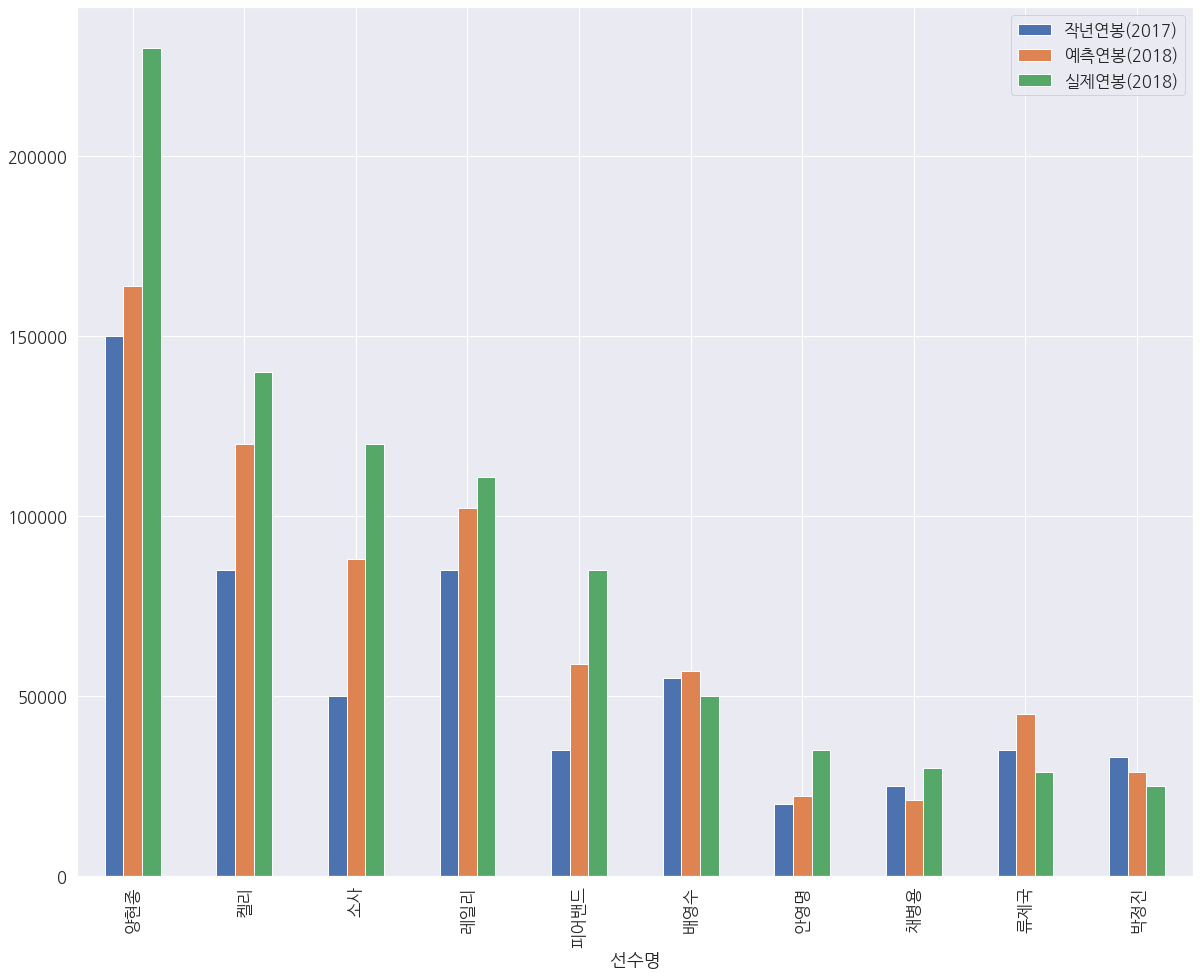

In [ ]:
# 3. matplotlib의 폰트를 Nanum 폰트로 지정한다.
plt.rc('font', family='NanumGothic') 

# 선수별 연봉 정보(작년 연봉, 예측 연봉, 실제 연봉)를 bar 그래프로 출력한다.
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind="bar")